In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('gemstone.csv')
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [3]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [4]:
df.drop('id',axis=1,inplace=True)

In [5]:
df.corr()

C:\Users\Purushoth\AppData\Local\Temp\ipykernel_1960\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,carat,depth,table,x,y,z,price
carat,1.000000,0.027852,0.225737,0.980563,0.980161,0.974274,0.943396
depth,0.027852,1.000000,-0.230631,-0.010762,-0.011653,0.081821,0.001880
table,0.225737,-0.230631,1.000000,0.237578,0.233299,0.212208,0.174915
x,0.980563,-0.010762,0.237578,1.000000,0.999109,0.989724,0.901004
y,0.980161,-0.011653,0.233299,0.999109,1.000000,0.989527,0.901033
z,0.974274,0.081821,0.212208,0.989724,0.989527,1.000000,0.893037
price,0.943396,0.001880,0.174915,0.901004,0.901033,0.893037,1.000000


C:\Users\Purushoth\AppData\Local\Temp\ipykernel_1960\4000402881.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

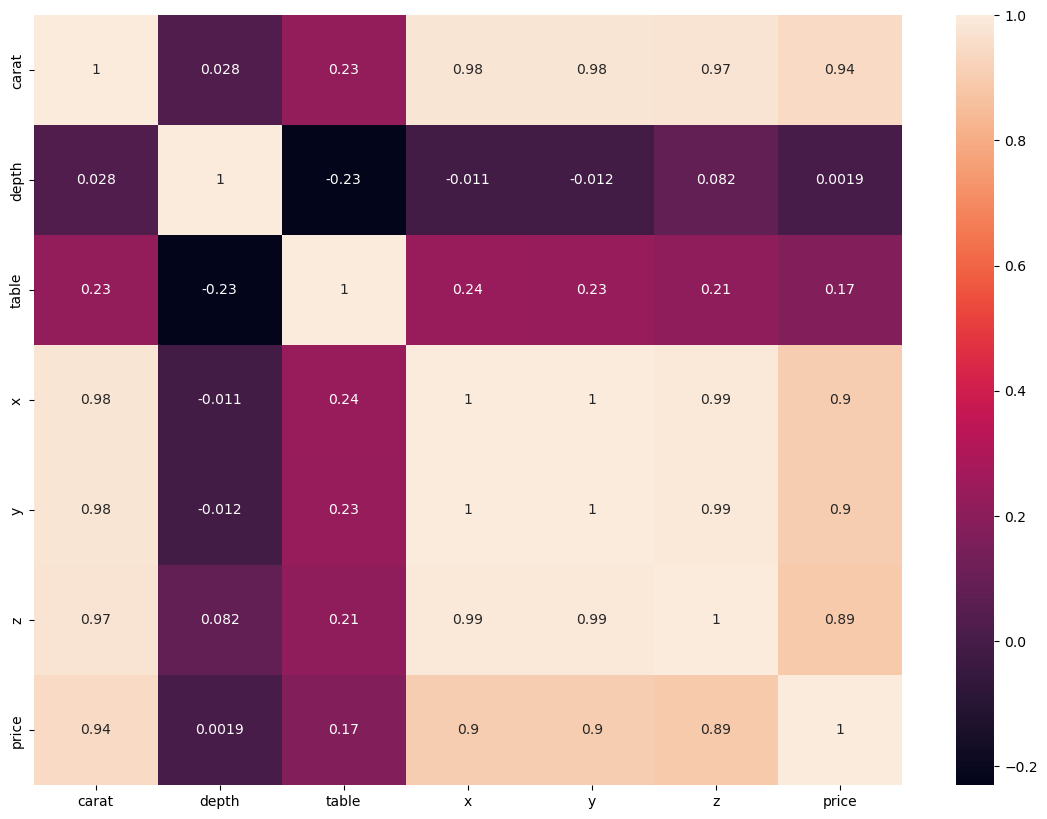

In [6]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True)

In [7]:
df.describe()

,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [8]:
iqr_carat = 1.03-0.40
low_carat = 0.40-1.5*(iqr_carat)
high_carat = 1.03+1.5*(iqr_carat)

In [9]:
print(low_carat,high_carat)

-0.545 1.975


In [10]:
ind = df[(df['carat']>1.975)|(df['carat']<-0.545)].index
df.drop(axis=0,index=ind,inplace=True)

In [11]:
iqr_dep = 62.40-61.30
low_dep = 61.30-1.5*(iqr_dep)
high_dep = 62.40+1.5*(iqr_dep)

In [12]:
print(low_dep,high_dep)

59.64999999999999 64.05


In [13]:
ind = df[(df['depth']>64.05)|(df['depth']<59.649)].index
df.drop(axis=0,index=ind,inplace=True)

In [14]:
iqr_tab = 58-56
low_tab = 56-1.5*(iqr_tab)
high_tab = 58+1.5*(iqr_tab)

In [15]:
print(low_tab,high_tab)

53.0 61.0


In [16]:
ind = df[(df['table']>61)|(df['table']<53)].index
df.drop(axis=0,index=ind,inplace=True)

In [17]:
iqr_z = 4-2.86
low_z = 2.86-1.5*(iqr_z)
high_z = 4+1.5*(iqr_z)

In [18]:
print(low_z,high_z)

1.1499999999999997 5.71


In [19]:
ind = df[(df['z']>5.71)|(df['z']<1.149)].index
df.drop(axis=0,index=ind,inplace=True)

In [20]:
df.describe()

,carat,depth,table,x,y,z,price
count,173950.000000,173950.000000,173950.000000,173950.000000,173950.000000,173950.000000,173950.000000
mean,0.729243,61.890214,57.000547,5.587178,5.593720,3.459871,3457.435016
std,0.390281,0.847880,1.696733,1.013372,1.007897,0.628653,3334.830167
min,0.200000,59.700000,53.000000,3.750000,3.710000,2.240000,326.000000
25%,0.370000,61.400000,56.000000,4.630000,4.640000,2.860000,905.000000
50%,0.700000,61.900000,57.000000,5.620000,5.630000,3.480000,2170.000000
75%,1.010000,62.400000,58.000000,6.440000,6.440000,4.000000,4958.000000
max,1.970000,64.000000,61.000000,8.180000,8.150000,5.290000,18818.000000


In [21]:
df.head(20)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
5,1.51,Very Good,J,SI1,62.8,58.0,7.34,7.29,4.59,7506
6,0.74,Ideal,E,VS2,61.8,57.0,5.76,5.79,3.57,3229
7,1.34,Premium,G,SI2,62.5,57.0,7.00,7.05,4.38,6224
8,0.30,Ideal,F,IF,62.0,56.0,4.35,4.37,2.70,886
9,0.30,Good,J,VS1,63.6,57.0,4.26,4.28,2.72,421
10,1.01,Very Good,G,VS2,63.1,57.0,6.40,6.34,4.03,5914


In [22]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [23]:
# Define the custom ranking for each ordinal variable
cut_categories = ['Fair', 'Good', 'Very Good','Premium','Ideal']
color_categories = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
clarity_categories = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

In [24]:
## Independent and dependent features
X = df.drop(labels=['price'],axis=1)
Y = df[['price']]

In [25]:
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

In [26]:
categorical_cols

Index(['cut', 'color', 'clarity'], dtype='object')

In [27]:
numerical_cols

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [28]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())

    ]

)

# Categorigal Pipeline
cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ordinalencoder',OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories])),
    ('scaler',StandardScaler())
    ]

)

preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('cat_pipeline',cat_pipeline,categorical_cols)
])


In [29]:
## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=30)

In [30]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [31]:
X_train.head()

,num_pipeline__carat,num_pipeline__depth,num_pipeline__table,num_pipeline__x,num_pipeline__y,num_pipeline__z,cat_pipeline__cut,cat_pipeline__color,cat_pipeline__clarity
0,-0.841741,0.838947,0.000368,-0.903159,-0.884746,-0.840907,0.838237,-0.909706,-0.038691
1,1.980186,0.838947,-0.588587,1.704107,1.647178,1.738649,-0.248749,0.972895,-0.704016
2,-0.046471,1.900853,0.589323,0.044938,0.078378,0.210023,-1.335735,-1.537239,-0.038691
3,0.723146,-0.104969,0.000368,0.825142,0.852849,0.831027,0.838237,0.345361,0.626634
4,2.801111,1.782864,1.767232,2.089272,1.994697,2.216344,-3.509707,0.345361,0.626634


In [32]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score

In [33]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [34]:
y_pred=regression.predict(X_test)

In [35]:
r2_score(y_test,y_pred)*100

92.54151343779363

In [36]:
rid=Ridge()
rid.fit(X_train,y_train)

Ridge()

In [37]:
y_pre=rid.predict(X_test)

In [38]:
r2_score(y_test,y_pre)*100

92.54240344885662

In [40]:
import pickle
pickle.dump(regression,open('regmodel.pkl','wb'))

In [41]:
pickle.dump(preprocessor,open('preprocess.pkl','wb'))